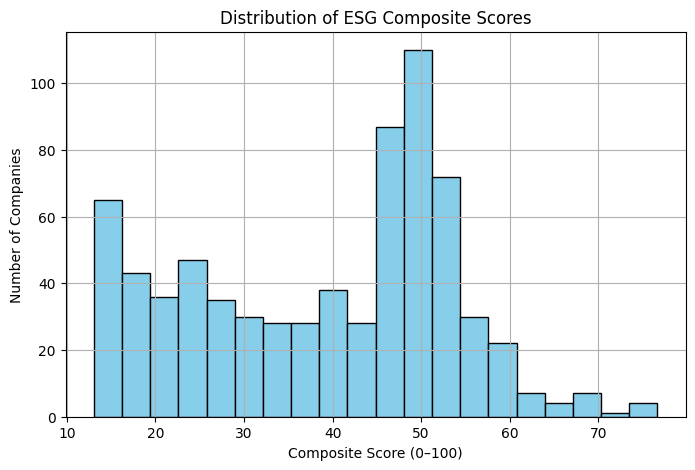

/tmp/ipython-input-2296000207.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_avg.sort_values("esg_composite", ascending=False).head(10),


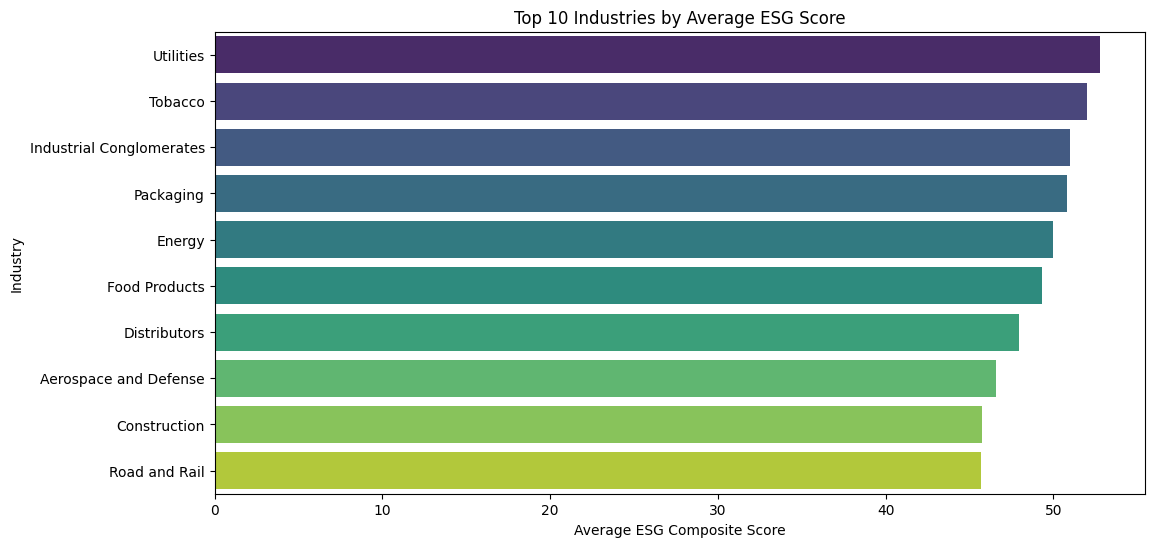

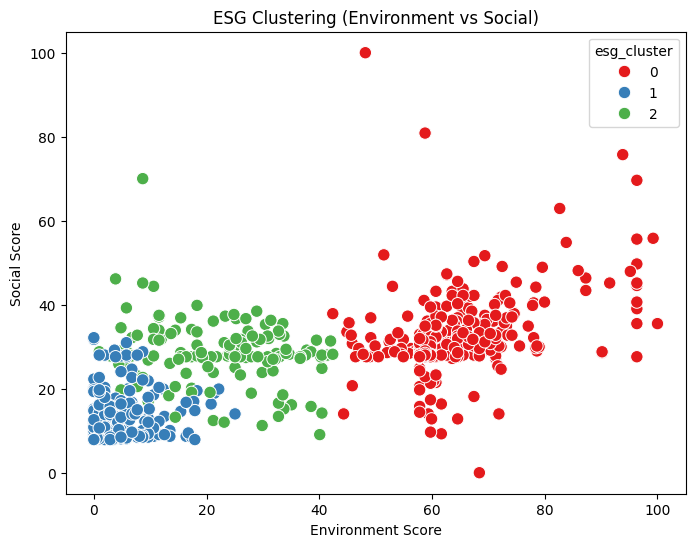

Preprocessing, Feature Engineering, EDA, and Clustering complete!
Cleaned dataset saved as 'esg_cleaned.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


# Load Dataset

file_path = "/data.csv"
df = pd.read_csv(file_path)


# Handle Missing Values

numeric_cols = ["environment_score", "social_score", "governance_score", "total_score"]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = ["industry", "exchange", "currency"]
for col in categorical_cols:
    df[col] = df[col].fillna("Unknown")


# Normalize ESG Metrics (0–100 scale)

scaler = MinMaxScaler(feature_range=(0, 100))
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# Feature Engineering

# Composite ESG score
df["esg_composite"] = df[["environment_score", "social_score", "governance_score"]].mean(axis=1)

# Industry benchmark (average ESG score per industry)
industry_avg = df.groupby("industry")["esg_composite"].mean().reset_index()

# Label: High / Medium / Low ESG
df["esg_label"] = pd.qcut(df["esg_composite"], q=3, labels=["Low", "Medium", "High"])


# Exploratory Data Analysis (Visuals)

# Histogram of ESG scores
plt.figure(figsize=(8,5))
df["esg_composite"].hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of ESG Composite Scores")
plt.xlabel("Composite Score (0–100)")
plt.ylabel("Number of Companies")
plt.show()

# Industry average bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=industry_avg.sort_values("esg_composite", ascending=False).head(10),
            x="esg_composite", y="industry", palette="viridis")
plt.title("Top 10 Industries by Average ESG Score")
plt.xlabel("Average ESG Composite Score")
plt.ylabel("Industry")
plt.show()


# Machine Learning (Clustering Example)

X = df[["environment_score", "social_score", "governance_score"]]

# KMeans clustering into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["esg_cluster"] = kmeans.fit_predict(X)

# Cluster visualization
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="environment_score", y="social_score",
                hue="esg_cluster", palette="Set1", s=80)
plt.title("ESG Clustering (Environment vs Social)")
plt.xlabel("Environment Score")
plt.ylabel("Social Score")
plt.show()


# Save Cleaned & Processed Data

df.to_csv("esg_cleaned.csv", index=False)
print("Preprocessing, Feature Engineering, EDA, and Clustering complete!")
print("Cleaned dataset saved as 'esg_cleaned.csv'")






Model Evaluation Results:
Accuracy: 0.986

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        49
         Low       0.98      0.98      0.98        48
      Medium       0.98      0.98      0.98        48

    accuracy                           0.99       145
   macro avg       0.99      0.99      0.99       145
weighted avg       0.99      0.99      0.99       145



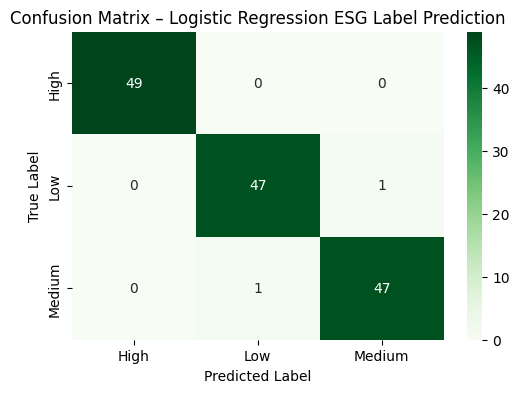

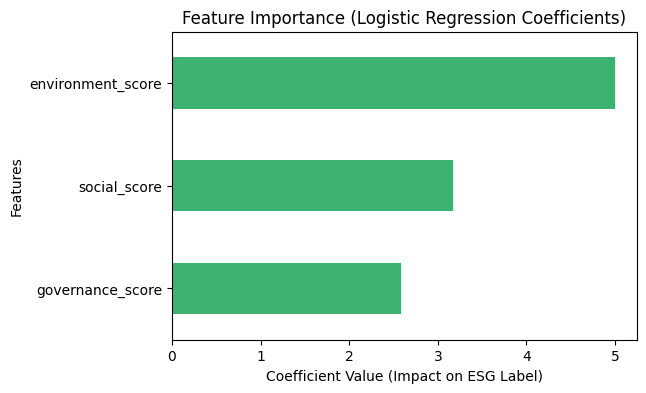


Feature Influence:
 - environment_score: positive influence (4.996) on ESG label prediction
 - social_score: positive influence (3.169) on ESG label prediction
 - governance_score: positive influence (2.586) on ESG label prediction


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/esg_cleaned.csv"
df = pd.read_csv(file_path)

X = df[["environment_score", "social_score", "governance_score"]]
y = df["esg_label"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

log_reg = LogisticRegression(max_iter=500, random_state=42, class_weight="balanced")
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Greens",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix – Logistic Regression ESG Label Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

coefficients = pd.Series(log_reg.coef_[0], index=X.columns)
plt.figure(figsize=(6, 4))
coefficients.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value (Impact on ESG Label)")
plt.ylabel("Features")
plt.show()

print("\nFeature Influence:")
for feature, coef in zip(X.columns, log_reg.coef_[0]):
    direction = "positive" if coef > 0 else "negative"
    print(f" - {feature}: {direction} influence ({coef:.3f}) on ESG label prediction")


Model Evaluation Results:
Accuracy: 0.952

Classification Report:
               precision    recall  f1-score   support

        High       0.96      0.96      0.96        49
         Low       0.96      0.98      0.97        48
      Medium       0.94      0.92      0.93        48

    accuracy                           0.95       145
   macro avg       0.95      0.95      0.95       145
weighted avg       0.95      0.95      0.95       145



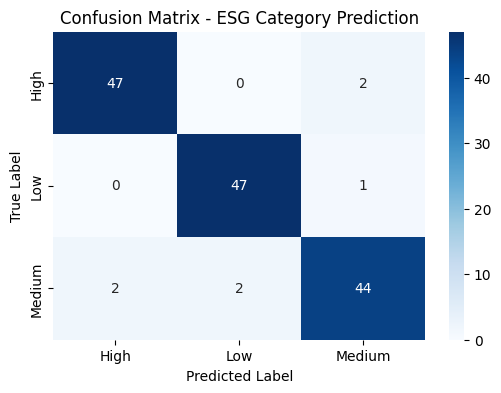

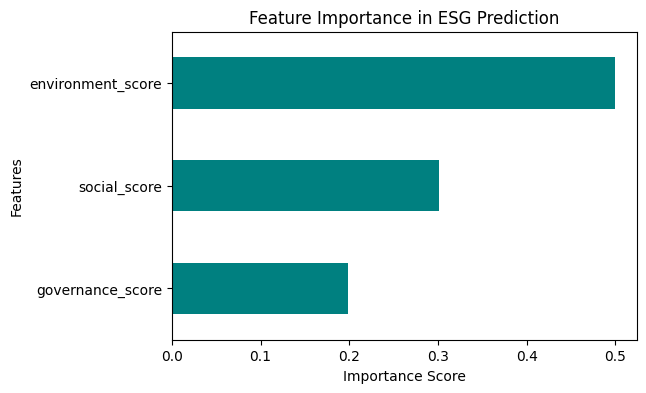

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "/content/esg_cleaned.csv"
df = pd.read_csv(file_path)


X = df[["environment_score", "social_score", "governance_score"]]
y = df["esg_label"]


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight="balanced"
)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

print("Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - ESG Category Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(6,4))
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance in ESG Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pandas as pd

# Encode target labels
label_encoder = LabelEncoder()
df["esg_label_encoded"] = label_encoder.fit_transform(df["esg_label"])

# Define features and target
X = df[["environment_score", "social_score", "governance_score"]]
y = df["esg_label_encoded"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

#Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Results summary
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\nOverall Model Performance:")
print(results_df)



=== Logistic Regression ===
Accuracy: 0.995
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        73
         Low       0.99      1.00      0.99        72
      Medium       1.00      0.99      0.99        72

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217


=== Decision Tree ===
Accuracy: 0.903
              precision    recall  f1-score   support

        High       0.91      0.86      0.89        73
         Low       0.97      0.96      0.97        72
      Medium       0.83      0.89      0.86        72

    accuracy                           0.90       217
   macro avg       0.91      0.90      0.90       217
weighted avg       0.91      0.90      0.90       217


=== Random Forest ===
Accuracy: 0.935
              precision    recall  f1-score   support

        High       0.97      0.92      0.94        73
      

/tmp/ipython-input-4176458581.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Accuracy", y="Model", palette="coolwarm")


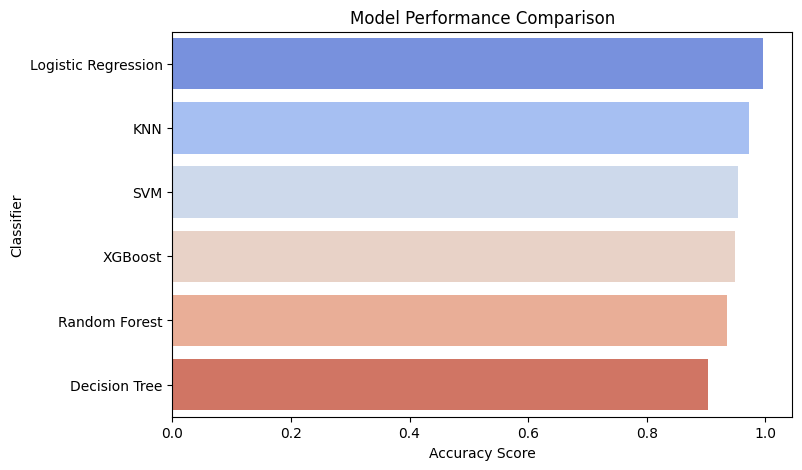

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Accuracy", y="Model", palette="coolwarm")
plt.title("Model Performance Comparison")
plt.xlabel("Accuracy Score")
plt.ylabel("Classifier")
plt.show()


In [ ]:
import joblib
from sklearn.linear_model import LogisticRegression

# Retrain on full dataset
X = df[["environment_score", "social_score", "governance_score"]]
y = df["esg_label"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_enc = le.fit_transform(y)

final_model = LogisticRegression(max_iter=1000)
final_model.fit(X, y_enc)

# Save the model and label encoder
joblib.dump(final_model, "final_esg_model.pkl")
joblib.dump(le, "label_encoder.pkl")

print("Final Logistic Regression model trained and saved successfully!")


Final Logistic Regression model trained and saved successfully!


/usr/local/lib/python3.12/dist-packages/shap/plots/_decision.py:78: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)


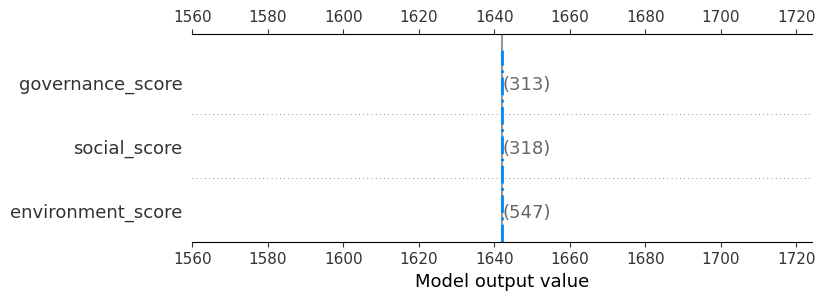

In [ ]:
import shap

import pandas as pd

import joblib



# Load model and data

model = joblib.load("final_esg_model.pkl")

df = pd.read_csv("/data.csv")

X = df[["environment_score", "social_score", "governance_score"]]



# Single sample index

sample_index = 5

single_sample = X.iloc[[sample_index]]  # Keep 2D



# Initialize explainer for the single sample

masker = shap.maskers.Independent(single_sample)

explainer = shap.LinearExplainer(model, masker=masker)

single_shap_values = explainer(single_sample)



# Extract values for the **first class** (index 0)

shap_values_class0 = single_shap_values.values[0][0]      # 1D array for features

base_value_class0 = single_shap_values.base_values[0][0]  # scalar



# Decision plot for the first class

shap.initjs()

shap.decision_plot(

    base_value=base_value_class0,

    shap_values=shap_values_class0,

    features=single_sample.iloc[0],

    feature_names=X.columns.tolist(),

    highlight=0

)


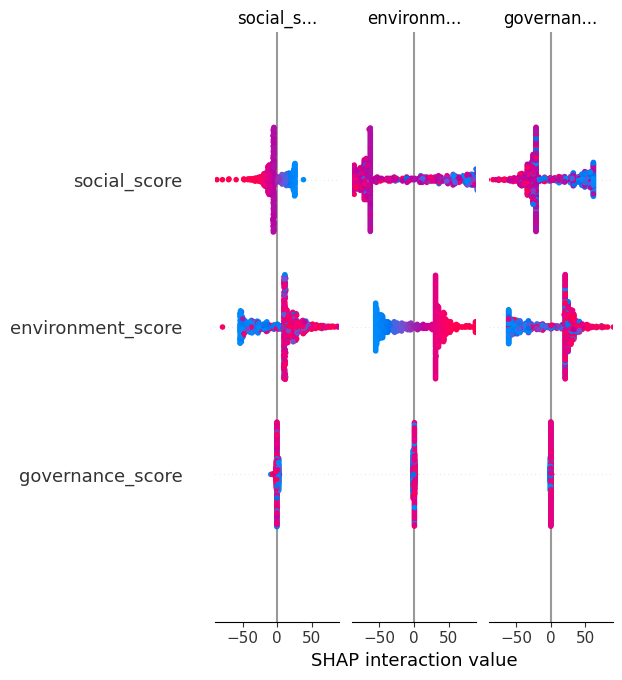

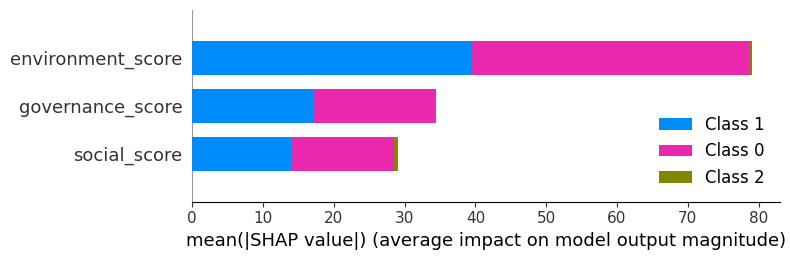

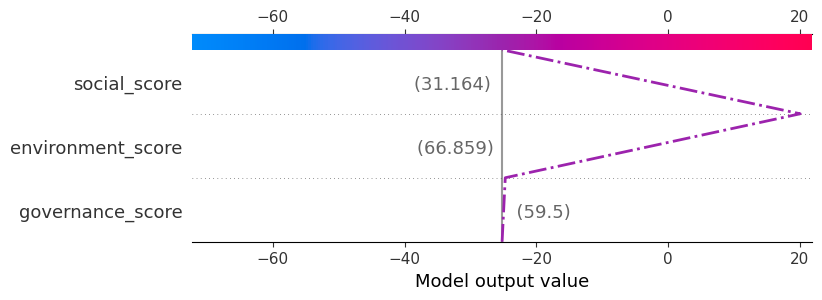

In [ ]:
# Full SHAP Workflow for Logistic Regression (Multi-class Safe)


import shap
import pandas as pd
import joblib
import matplotlib.pyplot as plt


# Load model and data

model = joblib.load("final_esg_model.pkl")
df = pd.read_csv("/content/esg_cleaned.csv")
X = df[["environment_score", "social_score", "governance_score"]]


# Initialize SHAP explainer

masker = shap.maskers.Independent(X)
explainer = shap.LinearExplainer(model, masker=masker)
shap_values = explainer(X)  # returns Explanation object


# Summary Plot — average impact of features

shap.summary_plot(
    shap_values.values,  # multi-class aware; works with Explanation object
    X,
    feature_names=X.columns.tolist()
)


# Bar Plot — ranked feature importance

shap.summary_plot(
    shap_values.values,
    X,
    plot_type="bar",
    feature_names=X.columns.tolist()
)


# Force Plot — single sample (interactive JS)

sample_index = 5
single_row = X.iloc[[sample_index]]  # 2D DataFrame

# Extract SHAP values for the first class (index 0)
shap_values_class0 = shap_values.values[sample_index][0]      # 1D array
base_value_class0 = shap_values.base_values[sample_index][0]  # scalar

shap.initjs()
force_plot = shap.plots.force(
    base_value=base_value_class0,
    shap_values=shap_values_class0,
    features=single_row.iloc[0]  # pandas Series
)
force_plot  # renders interactively in notebook

# Decision Plot — single sample, first class

shap.initjs()
shap.decision_plot(
    base_value=base_value_class0,
    shap_values=shap_values_class0,
    features=single_row.iloc[0],  # pandas Series
    feature_names=X.columns.tolist(),
    highlight=0
)


In [ ]:
import sqlalchemy

# Create database engine
engine = sqlalchemy.create_engine("sqlite:///esg_dashboard.db")

# Combine features, actual and predicted results
results = X_test.copy()
results["actual_risk"] = y_test.values
results["predicted_risk"] = y_pred

# Save to database
results.to_sql("esg_predictions", engine, if_exists="replace", index=False)

print("✅ Results saved to esg_dashboard.db → Table: esg_predictions")

# Preview saved results
pd.read_sql("SELECT * FROM esg_predictions LIMIT 5;", engine)


✅ Results saved to esg_dashboard.db → Table: esg_predictions


,environment_score,social_score,governance_score,actual_risk,predicted_risk
0,64.161850,27.613412,56.25,0,0
1,5.780347,8.284024,31.25,1,1
2,65.510597,33.136095,60.00,0,0
3,32.177264,27.021696,40.00,2,2
4,17.919075,14.990138,36.25,1,1
